<a href="https://colab.research.google.com/github/matyi101/MANB1153/blob/main/PMA1_Single_Home_Value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **POST MODULE ASSESSMENT SEMESTER 1 (SESSIOn 2021/2022)**
## **MANB 1153 - DATA MINING AND BUSINESS ANALYTICS**
### MOHD NAZRI BIN NAWI (MAN201071)

## 1. Loading libraries and packages.

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt  

%matplotlib  inline 

## 2. Load data

In [2]:
# Data from kaggle is downloaded and then uploaded to github. URL linked is used to read data from Github.
# Data URL link https://www.kaggle.com/kylet550/single-family-home-values-by-city (Source: Zillow Home Value Index (ZHVI)).
url = 'https://raw.githubusercontent.com/matyi101/dataset/main/single_family_home_values.csv'
df = pd.read_csv(url)
df.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## 3. Data Cleaning 

In [3]:
# Checking shape of data

df.shape

(15000, 18)

In [4]:
# Check for missing value from dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [5]:
# From data above, there are missing values in latitute, longitude, yearBuilt, priorSalesDate and priorSateDate. 
# These missing value (NA) will be filled with mean value.

df=df.fillna(df.mean())
df.dropna(inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11173 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11173 non-null  int64  
 1   address          11173 non-null  object 
 2   city             11173 non-null  object 
 3   state            11173 non-null  object 
 4   zipcode          11173 non-null  int64  
 5   latitude         11173 non-null  float64
 6   longitude        11173 non-null  float64
 7   bedrooms         11173 non-null  int64  
 8   bathrooms        11173 non-null  float64
 9   rooms            11173 non-null  int64  
 10  squareFootage    11173 non-null  int64  
 11  lotSize          11173 non-null  int64  
 12  yearBuilt        11173 non-null  float64
 13  lastSaleDate     11173 non-null  object 
 14  lastSaleAmount   11173 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11173 non-null  float64
 17  estimated_va

## 4. Exploratory Data Analysis (EDA)

In [6]:
df.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.117300e+04,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,1.117300e+04,1.117300e+04,1.117300e+04
mean,4.419642e+07,80205.002954,39.741310,-104.963570,2.682359,2.209031,6.116441,1481.227244,5685.553209,1929.062160,4.229467e+05,2.624790e+05,6.310055e+05
std,5.665783e+07,9.181246,0.023230,0.039600,0.878987,1.159730,1.933034,801.192486,2506.781712,29.796315,5.786213e+05,3.387000e+05,5.002564e+05
min,1.433670e+05,80022.000000,39.614539,-105.108407,0.000000,0.000000,0.000000,350.000000,278.000000,1874.000000,5.000000e+02,0.000000e+00,1.477670e+05
25%,8.653576e+06,80205.000000,39.728112,-104.978430,2.000000,1.000000,5.000000,979.000000,4460.000000,1906.000000,2.239000e+05,1.150000e+05,4.015370e+05
50%,2.170586e+07,80206.000000,39.748887,-104.957680,3.000000,2.000000,6.000000,1240.000000,5950.000000,1925.000000,3.450000e+05,2.140000e+05,5.157780e+05
75%,4.622806e+07,80207.000000,39.758784,-104.936418,3.000000,3.000000,7.000000,1700.000000,6250.000000,1949.000000,4.850000e+05,3.321070e+05,6.785300e+05
max,2.527298e+08,80209.000000,39.849160,-104.893468,15.000000,12.000000,39.000000,10907.000000,97125.000000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [7]:
df[['estimated_value', 'yearBuilt', 'priorSaleAmount']].head(2)

,estimated_value,yearBuilt,priorSaleAmount
0,239753,2003.0,165700.0
3,494073,1956.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


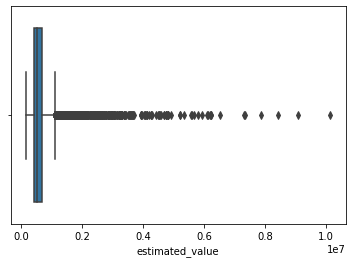

In [8]:
# Check for outliers using boxplot for extimated value
sns.boxplot(df.estimated_value)

In [9]:
# Get rid of outliers. Slicing out estimated value that is above USD 800,000.00 from dataframe
df = df[df.estimated_value<=800000]
df.shape


(9541, 18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


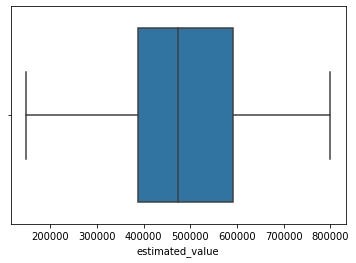

In [10]:
sns.boxplot(df.estimated_value)

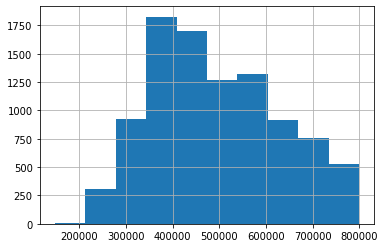

In [11]:
df.estimated_value.hist()

In [12]:
#filter out noise, slice df
df[(df.estimated_value<=1000000)  &  (df.yearBuilt>2013) &  (df.zipcode==80209)] 

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
13276,39512040,764 S York St,Denver,CO,80209,39.702607,-104.960243,3,4.0,7,2567,6250,2016.0,2012-07-23,420000,2010-11-29,385000.0,770622
13316,11586398,450 S Vine St,Denver,CO,80209,39.708351,-104.962546,3,5.0,7,2570,4680,2016.0,2015-02-11,571000,2007-01-03,399000.0,682810
13428,11586742,636 S Williams St,Denver,CO,80209,39.704969,-104.966025,3,5.0,6,2578,4680,2016.0,2015-07-22,637600,2007-02-02,481900.0,745777
13431,184305844,456 S High St,Denver,CO,80209,39.708197,-104.964857,3,5.0,10,3346,6240,2016.0,2016-01-11,725000,1993-07-15,124000.0,751361
13766,7652681,408 S Franklin St,Denver,CO,80209,39.709074,-104.968369,3,5.0,8,3367,5060,2015.0,2014-04-21,513486,2007-08-22,435000.0,709102
14982,43208991,731 S Elizabeth St,Denver,CO,80209,39.703135,-104.956141,2,3.0,6,2680,6160,2016.0,2015-03-31,485000,2003-06-19,357500.0,753935


In [13]:
df.describe() 

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,9.541000e+03,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9.541000e+03,9.541000e+03,9541.000000
mean,4.105231e+07,80204.672990,39.744091,-104.965074,2.543025,1.895137,5.671418,1248.155958,5428.923488,1927.122473,3.293560e+05,2.028308e+05,493619.475631
std,5.462284e+07,9.762654,0.022745,0.042052,0.751769,0.763786,1.375394,425.426176,1700.874076,27.265469,5.043234e+05,1.572737e+05,135785.916292
min,1.433670e+05,80022.000000,39.614539,-105.108407,0.000000,0.000000,0.000000,350.000000,278.000000,1874.000000,5.000000e+02,0.000000e+00,147767.000000
25%,7.435623e+06,80205.000000,39.731155,-104.981756,2.000000,1.000000,5.000000,947.000000,4430.000000,1906.000000,2.040000e+05,1.050000e+05,387179.000000
50%,1.959154e+07,80205.000000,39.751776,-104.958432,2.000000,2.000000,5.000000,1142.000000,5940.000000,1925.000000,3.135000e+05,1.926000e+05,474397.000000
75%,4.322824e+07,80207.000000,39.759879,-104.933618,3.000000,2.000000,6.000000,1478.000000,6250.000000,1949.000000,4.190000e+05,2.900000e+05,591917.000000
max,2.527298e+08,80209.000000,39.849160,-104.893468,9.000000,11.000000,21.000000,4695.000000,22400.000000,2016.000000,4.560000e+07,4.475900e+06,799746.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9541 entries, 0 to 14994
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               9541 non-null   int64  
 1   address          9541 non-null   object 
 2   city             9541 non-null   object 
 3   state            9541 non-null   object 
 4   zipcode          9541 non-null   int64  
 5   latitude         9541 non-null   float64
 6   longitude        9541 non-null   float64
 7   bedrooms         9541 non-null   int64  
 8   bathrooms        9541 non-null   float64
 9   rooms            9541 non-null   int64  
 10  squareFootage    9541 non-null   int64  
 11  lotSize          9541 non-null   int64  
 12  yearBuilt        9541 non-null   float64
 13  lastSaleDate     9541 non-null   object 
 14  lastSaleAmount   9541 non-null   int64  
 15  priorSaleDate    9541 non-null   object 
 16  priorSaleAmount  9541 non-null   float64
 17  estimated_val

In [15]:
df= df[df.lastSaleAmount<=800000]

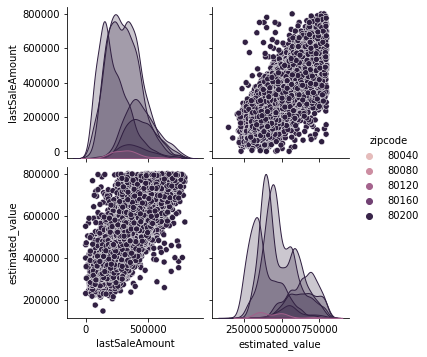

In [16]:
sns.pairplot(df[['lastSaleAmount', 'estimated_value', 'zipcode']], hue='zipcode')

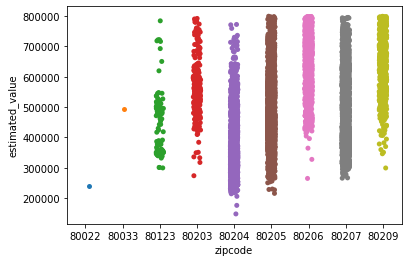

In [17]:
sns.stripplot(x=df.zipcode, y=df.estimated_value)

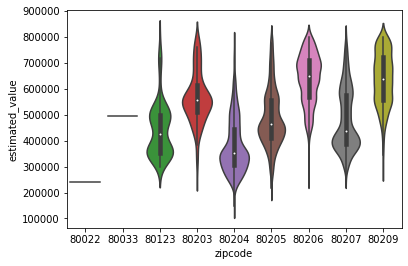

In [18]:
sns.violinplot(x=df.zipcode, y=df.estimated_value)

In [19]:
df['priorSaleDate'] = pd.to_datetime(df.priorSaleDate)
df['lastSaleDate'] = pd.to_datetime(df.lastSaleDate)

df['weekday_lastSaleDate'] = df.lastSaleDate.dt.weekday
df['year_lastSaleDate'] = df.lastSaleDate.dt.year

df['weekday_priorSaleDate'] = df.priorSaleDate.dt.weekday
df['year_priorSaleDate'] = df.priorSaleDate.dt.year

df['year_between_last_sales']=df.year_lastSaleDate-df.year_priorSaleDate


In [20]:
df.corr().loc[ 'estimated_value' , : ].sort_values(ascending=False)

estimated_value            1.000000
lastSaleAmount             0.738642
squareFootage              0.613362
bathrooms                  0.586416
priorSaleAmount            0.539670
rooms                      0.525103
bedrooms                   0.280232
longitude                  0.239454
id                         0.123097
zipcode                    0.098229
year_between_last_sales    0.062336
year_lastSaleDate          0.034776
weekday_lastSaleDate      -0.001775
weekday_priorSaleDate     -0.010604
year_priorSaleDate        -0.037243
lotSize                   -0.130200
latitude                  -0.162350
yearBuilt                 -0.273512
Name: estimated_value, dtype: float64

## 5.0 Data Mining

In [21]:
# Checking median value based on zipcode

df2= df.groupby('zipcode').estimated_value.median().reset_index()
df2.columns=['zipcode', 'median_value']
df2

,zipcode,median_value
0,80022,239753.0
1,80033,494073.0
2,80123,427234.5
3,80203,555957.0
4,80204,351899.0
5,80205,464200.5
6,80206,649269.0
7,80207,436920.0
8,80209,637302.0


In [22]:
# Full details 

df3 = pd.merge(df, df2, on='zipcode', how='left')
df3.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,weekday_lastSaleDate,year_lastSaleDate,weekday_priorSaleDate,year_priorSaleDate,year_between_last_sales,median_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,3,2009,3,2004,5,239753.0
1,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,1,2008,4,2008,0,494073.0
2,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,2,2012,3,2011,1,427234.5
3,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062,1,2006,0,2005,1,427234.5
4,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953,0,2014,4,2006,8,427234.5


In [23]:
X = df.drop('estimated_value', axis=1)
X= X[['bedrooms', 'bathrooms',  'rooms', 'squareFootage','lotSize', 'yearBuilt', 'priorSaleAmount']]
X.fillna(0, inplace=True)
X.head(2)

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
3,4,3.0,0,2400,11500,1956.0,0.0


### 5.1 Cluster Analysis 

In [24]:
from sklearn.cluster import KMeans
from  sklearn.metrics import silhouette_score 

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
kmeans

KMeans(n_clusters=5, random_state=0)

In [25]:
labels= kmeans.labels_
labels

array([0, 2, 2, ..., 0, 1, 1], dtype=int32)

In [26]:
len(kmeans.labels_), X.shape

(9505, (9505, 7))

In [27]:
kmeans.cluster_centers_

array([[2.50149076e+00, 1.73732856e+00, 5.41293977e+00, 1.15814371e+03,
        5.54791175e+03, 1.93033379e+03, 1.63199441e+05],
       [2.68256579e+00, 2.37253289e+00, 6.44407895e+00, 1.50675905e+03,
        5.23539638e+03, 1.92078701e+03, 4.32288421e+05],
       [2.46803755e+00, 1.62516764e+00, 5.33839964e+00, 1.12971390e+03,
        5.65352347e+03, 1.93032901e+03, 2.91220782e+04],
       [2.85714286e+00, 2.28571429e+00, 6.57142857e+00, 1.82314286e+03,
        7.13628571e+03, 1.92814286e+03, 3.09291429e+06],
       [2.59234485e+00, 2.09401709e+00, 5.91304348e+00, 1.33534262e+03,
        5.17816871e+03, 1.92334560e+03, 2.83578681e+05]])

In [28]:
# Determine cluster and features
kmeans.cluster_centers_.shape

(5, 7)

In [29]:
X['cluster'] = labels

In [30]:
X.groupby('cluster').mean()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
cluster,,,,,,,
0,2.501491,1.737329,5.412940,1158.143709,5547.911747,1930.333786,1.631994e+05
1,2.682305,2.372016,6.444444,1506.700412,5234.413169,1920.804115,4.323496e+05
2,2.468038,1.625168,5.338400,1129.713903,5653.523469,1930.329012,2.912208e+04
3,2.857143,2.285714,6.571429,1823.142857,7136.285714,1928.142857,3.092914e+06
4,2.592496,2.094354,5.913076,1335.432764,5178.633730,1923.336924,2.836063e+05


In [31]:
X= X.drop('cluster', axis=1)

In [32]:
for i in range(3, 10):
    kmeans=KMeans(n_clusters=i).fit(X)
    labels = kmeans.labels_
    print (silhouette_score(X,  labels))
 

0.5633351575280513
0.5543106726009864
0.5614023520824788
0.5548821056614371
0.569687071157063
0.5705247655138984
0.5682647590391366


7.0 Classification And Regression

In [33]:
from sklearn.linear_model import LinearRegression, LogisticRegression 

from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [34]:
X.head()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
3,4,3.0,0,2400,11500,1956.0,0.0
4,3,4.0,8,2305,5600,1998.0,0.0
5,3,5.0,7,2051,6045,1996.0,339000.0
6,4,4.0,8,2051,6315,1997.0,345000.0


In [35]:
y=df.estimated_value 


In [36]:
lg = LinearRegression()
lg.fit(X,y) #training 
lg.score(X,y) 

0.6203217417470884

In [37]:
X_train, X_test,  y_train, y_test= train_test_split(X,y)

In [38]:
X_train.shape, y_train.shape 

((7128, 7), (7128,))

In [39]:
lg = LinearRegression()
lg.fit(X_train,y_train) # training , fit 
lg.score(X_test,y_test) # evaluate , score, R2 

0.6047350701550862

In [40]:
df['estimated_value_bins']=df.estimated_value.apply(lambda x: 'high' if x> 500000 else 'low')
df.estimated_value_bins.value_counts()

low     5266
high    4239
Name: estimated_value_bins, dtype: int64

In [41]:
y2= df.estimated_value_bins
log = LogisticRegression() 

In [42]:
X_train, X_test,  y2_train, y2_test= train_test_split(X,y2)
log.fit(X_train, y2_train)
log.score(X_test, y2_test)

0.8186790071518721

In [43]:
y_pred = log.predict(X_test)
np.array(y2_test)


array(['high', 'high', 'low', ..., 'high', 'low', 'high'], dtype=object)

In [44]:
confusion_matrix(y2_test,y_pred )

array([[ 825,  255],
       [ 176, 1121]])

In [45]:
from IPython.display import Image
Image('svm.png')
print ('Support Vector Machine')

Support Vector Machine


In [46]:
svr= SVR() 
svr.fit(X_train, y_train)
svr.score(X_test, y_test) 
# not so great 

-0.04326092442739804

In [47]:
svc= SVC() 
svc.fit(X_train, y2_train)
svc.score(X_test, y2_test) 

0.7766091712242322

In [48]:
y2_pred=svc.predict(X_test)
confusion_matrix(y2_test, y2_pred)

array([[ 701,  379],
       [ 152, 1145]])

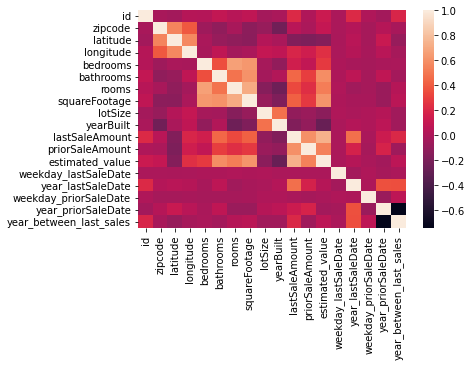

In [49]:
sns.heatmap(df.corr())

In [50]:
df.cov()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value,weekday_lastSaleDate,year_lastSaleDate,weekday_priorSaleDate,year_priorSaleDate,year_between_last_sales
id,2.959910e+15,-8.705458e+06,-47752.131531,93236.832727,1.276050e+06,3.836301e+06,3.358841e+06,1.883294e+09,-2.699986e+09,-1.634199e+07,1.722076e+12,9.258050e+10,9.080904e+11,-245987.215205,5.190845e+07,994710.772587,-1.330764e+07,6.521609e+07
zipcode,-8.705458e+06,9.565335e+01,0.123173,0.160960,-4.371180e-01,-8.253896e-01,-2.533268e-01,-5.154014e+02,-1.342655e+03,-6.142796e+01,7.154451e+04,-9.349284e+03,1.302661e+05,-0.054843,1.313042e+00,-0.302363,2.216033e+00,-9.029912e-01
latitude,-4.775213e+04,1.231727e-01,0.000518,0.000545,-1.288038e-04,-1.424524e-03,-3.479564e-03,-1.249238e+00,1.245497e+00,-8.003176e-03,-5.676448e+02,-6.583429e+02,-5.010186e+02,-0.000346,5.428446e-03,-0.000768,1.687986e-02,-1.145142e-02
longitude,9.323683e+04,1.609596e-01,0.000545,0.001772,-5.451144e-04,2.561100e-03,-1.877560e-03,-4.744244e-02,6.960272e+00,8.662413e-02,1.215964e+03,9.622585e+02,1.366922e+03,-0.000315,7.735238e-03,-0.001025,1.346106e-02,-5.725821e-03
bedrooms,1.276050e+06,-4.371180e-01,-0.000129,-0.000545,5.644850e-01,2.058616e-01,6.814757e-01,2.009550e+02,-3.079398e+01,-2.151574e+00,1.732094e+04,1.008508e+04,2.854880e+04,0.005829,-6.496338e-02,-0.028208,-4.857790e-02,-1.638548e-02
bathrooms,3.836301e+06,-8.253896e-01,-0.001425,0.002561,2.058616e-01,5.801356e-01,5.101489e-01,1.965318e+02,-3.940341e+01,4.936142e-01,5.066256e+04,3.523429e+04,6.056392e+04,0.000914,2.403668e-01,-0.023562,3.866227e-01,-1.462558e-01
rooms,3.358841e+06,-2.533268e-01,-0.003480,-0.001878,6.814757e-01,5.101489e-01,1.885349e+00,4.133368e+02,-3.546689e+02,-9.167129e+00,6.932989e+04,5.076449e+04,9.776502e+04,0.036733,-2.831779e-01,-0.053340,-5.984990e-01,3.153211e-01
squareFootage,1.883294e+09,-5.154014e+02,-1.249238,-0.047442,2.009550e+02,1.965318e+02,4.133368e+02,1.799083e+05,-5.966342e+04,-2.055101e+03,2.666075e+07,1.841948e+07,3.527654e+07,2.754246,-3.597795e+01,-10.837442,-1.811564e+02,1.451785e+02
lotSize,-2.699986e+09,-1.342655e+03,1.245497,6.960272,-3.079398e+01,-3.940341e+01,-3.546689e+02,-5.966342e+04,2.870948e+06,2.230244e+04,-2.625523e+07,-1.842423e+07,-2.991348e+07,22.914210,-1.524322e+01,19.921328,4.272451e+02,-4.424883e+02
yearBuilt,-1.634199e+07,-6.142796e+01,-0.008003,0.086624,-2.151574e+00,4.936142e-01,-9.167129e+00,-2.055101e+03,2.230244e+04,7.420160e+02,-6.920147e+05,-4.221508e+05,-1.010245e+06,-0.122815,3.877373e+00,0.451267,1.072156e+01,-6.844190e+00


In [51]:
y=df.estimated_value
X.columns

Index(['bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize',
       'yearBuilt', 'priorSaleAmount'],
      dtype='object')

====
bedrooms
mean: 2.542766964755392
std: 0.751322153127849


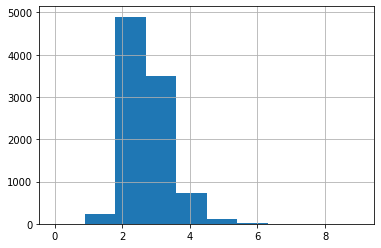

====
bathrooms
mean: 1.8935823250920567
std: 0.761666315910045


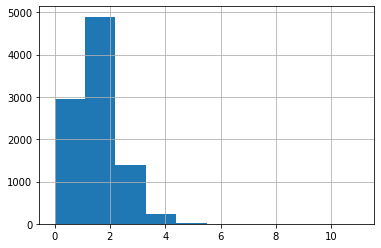

====
rooms
mean: 5.669752761704366
std: 1.3730800001319907


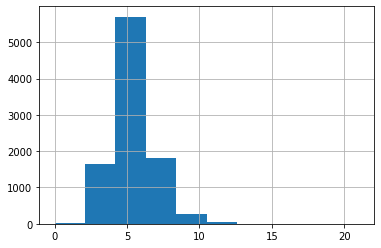

====
squareFootage
mean: 1246.7093108890058
std: 424.15602125738934


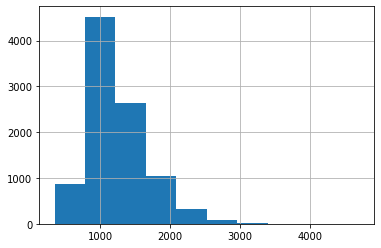

====
lotSize
mean: 5429.276801683324
std: 1694.3870776450287


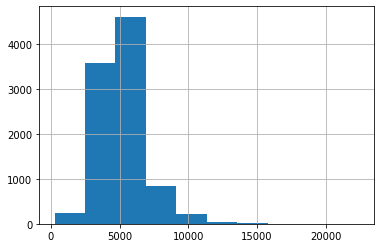

====
yearBuilt
mean: 1927.131248518444
std: 27.23996973788474


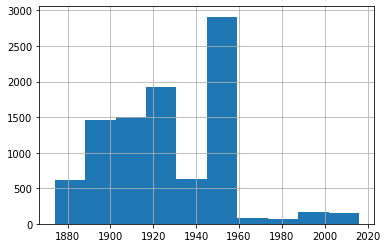

====
priorSaleAmount
mean: 202308.29733195703
std: 156377.08328884476


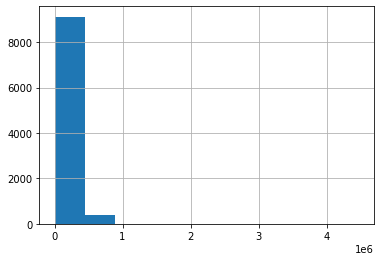

In [52]:
for i in X.columns:
  print  ('====')
  print (i)
  X.loc[:, i].hist()
  print ('mean:' ,  X.loc[:, i].mean())
  print ('std:' ,  X.loc[:, i].std())
  plt.show()